### <font color=darkred> [MSA : Modélisation, Apprentissage et Applications] </font>
### <font color = darkblue> <div style="text-align: center"> Projet de fin d'études
## <font color = darkgreen> <div style="text-align: center"> Apprentissage Statistique appliqué à la qualité de vie au travail
### <font color = darkgreen> <div style="text-align: center"> [Smart Building & OZE Energies]
#### <font color = darkblue> <div style="text-align: right"> Binôme : Jordan CHEMOUHOUM, Alaeddine ZEKRI

### Contexte

- La sensation thermique humaine dans un environnement peut être retardée, ce qui peut entraîner des affections mettant la vie en danger, telles que l'hypothermie et l'hyperthermie.
- Celà diffère d'une personne à une autre et peut s'avérer dangereux pour les individus âgés, car le vieillissement modifie la perception thermique.
- Nous envisageons un système d'aide à la décision qui prédit le confort thermique humain en temps réel en utilisant diverses conditions environnementales ainsi que des caractéristiques psychologiques et physiologiques

### Travail attendu

- Nous allons developper un modèle de confort thermique précis en suivant une approche basée sur l'apprentissage automatique pour apprendre ce modèle
- Après l'analyse de données à notre disposition, nous suggérons, grace à notre modèle, les actions correspondantes, qui peuvent améliorer de manière significative le confort thermique général et la santé des personnes, en particulier des personnes âgées.

- **Divers paramètres qui influencent le confort thermique** : 
    - Humidité
    - Taux de CO2
    - Température externe
    - L'age des personnes
    - Type de vêtements portés

In [1]:
#Format des données
import pandas as pd
import numpy as np

#Outils de graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ACP
from sklearn.preprocessing import StandardScaler

#Label Encoder
from sklearn import preprocessing

#Machine Learning tools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Machine Learning Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### <font color=darkred> Importation et exploration des données </font>

In [2]:
date = pd.read_csv('Data/confort_sync_data_date.csv')
humidite = pd.read_csv('Data/confort_sync_data_humidite.csv')
humiditex = pd.read_csv('Data/confort_sync_data_humiditex.csv')
tauxCO2 = pd.read_csv('Data/confort_sync_data_tauxCO2.csv')
temperature = pd.read_csv('Data/confort_sync_data_temperature.csv')
score_confort = pd.read_csv('Data/score_comfort.csv')

In [3]:
score_confort = score_confort.rename(columns={score_confort.columns[0]:'score'})

**Vérification de la cohérence des tailles**

In [4]:
data = [date, humidite, humiditex, tauxCO2, temperature, score_confort]
for d in data :
    print('size de '+ d.columns[0]+ ' = '+ str(d.shape))

size de Date = (1048575, 1)
size de humidite = (1048575, 1)
size de humidite_x = (1048575, 1)
size de tauxCO2 = (1048575, 1)
size de Température = (1048575, 1)
size de score = (1048575, 1)


In [5]:
training_data = pd.concat(data, axis=1)

In [6]:
training_data.head()

,Date,humidite,humidite_x,tauxCO2,Température,score
0,31/08/2017 23:00,NaN,25.7,NaN,22.7,4.0
1,31/08/2017 23:30,56.0,25.7,534.0,22.7,4.0
2,31/08/2017 23:50,55.0,25.6,544.0,22.7,4.0
3,01/09/2017 00:00,NaN,25.7,NaN,22.8,5.0
4,01/09/2017 00:30,55.0,25.7,506.0,22.8,4.0


**Informations sur les données : Type et nombre des valeures NULL**

In [7]:
#Informations sur les données
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
Date           1048575 non-null object
humidite       1048410 non-null float64
humidite_x     1048575 non-null float64
tauxCO2        1048291 non-null float64
Température    1048568 non-null float64
score          1006261 non-null float64
dtypes: float64(5), object(1)
memory usage: 48.0+ MB
None


In [8]:
#Nombre de NaN pour chaque colonne
training_data.isnull().sum(axis = 0)

Date               0
humidite         165
humidite_x         0
tauxCO2          284
Température        7
score          42314
dtype: int64

** Nous allons dans un premier temps supprimer les lignes qui contiennent NaN**

In [9]:
training_data = training_data.dropna()

In [10]:
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005983 entries, 1 to 1048574
Data columns (total 6 columns):
Date           1005983 non-null object
humidite       1005983 non-null float64
humidite_x     1005983 non-null float64
tauxCO2        1005983 non-null float64
Température    1005983 non-null float64
score          1005983 non-null float64
dtypes: float64(5), object(1)
memory usage: 53.7+ MB
None


** Nous avons à notre disposition un fichier à 1005983 de lignes**

In [11]:
training_data.head()

,Date,humidite,humidite_x,tauxCO2,Température,score
1,31/08/2017 23:30,56.0,25.7,534.0,22.7,4.0
2,31/08/2017 23:50,55.0,25.6,544.0,22.7,4.0
4,01/09/2017 00:30,55.0,25.7,506.0,22.8,4.0
5,01/09/2017 00:50,55.0,25.7,499.0,22.8,4.0
7,01/09/2017 01:30,55.0,25.9,577.0,22.9,4.0


** Valeurs unique pour chaque paramètre**

In [12]:
for d in data :
    print('valeurs uniques de '+ d.columns[0]+ ' = '+ str(len(training_data.groupby(d.columns[0])[d.columns[0]].nunique())))

valeurs uniques de Date = 58194
valeurs uniques de humidite = 82
valeurs uniques de humidite_x = 337
valeurs uniques de tauxCO2 = 2372
valeurs uniques de Température = 258
valeurs uniques de score = 5


### <font color=darkgreen> Colonne score (les labels) :
- Y a t-il des scores plus redondants que d'autres ? Voyons la distribution des données d'entrainement suivant les scores

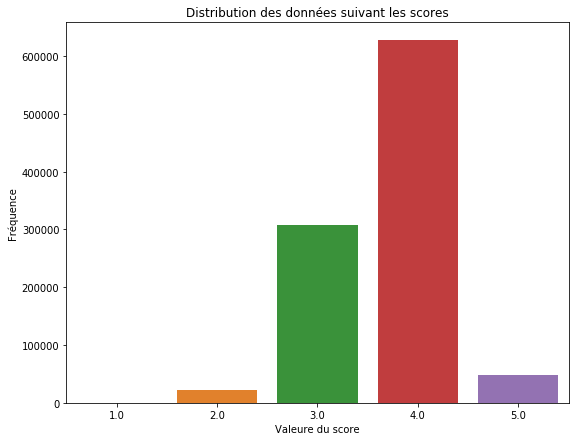

In [13]:
plt.figure(figsize=(9,7))
sns.countplot(x="score", data=training_data)
plt.ylabel('Fréquence')
plt.xlabel('Valeure du score')
plt.title("Distribution des données suivant les scores")
plt.show()

### <font color=darkgreen> Colonne Humidité :

In [14]:
#description de la colonne Humidité
print(training_data['humidite'].describe(include='all'))

count    1.005983e+06
mean     3.953577e+01
std      1.064147e+01
min      0.000000e+00
25%      3.200000e+01
50%      3.900000e+01
75%      4.700000e+01
max      8.800000e+01
Name: humidite, dtype: float64


** Humidité les plus présentes **

In [15]:
#comptage des valeurs de Humidité
training_data['humidite'].value_counts().head()

35.0    38938
34.0    38782
36.0    38213
33.0    36061
37.0    36053
Name: humidite, dtype: int64

### <font color=darkgreen> Colonne Humidité_X :

In [16]:
#description de la colonne Humidité
print(training_data['humidite_x'].describe(include='all'))

count    1.005983e+06
mean     2.463028e+01
std      3.985999e+00
min     -5.600000e+00
25%      2.210000e+01
50%      2.470000e+01
75%      2.740000e+01
max      4.220000e+01
Name: humidite_x, dtype: float64


** Humidité_X les plus présentes **

In [17]:
#comptage des valeurs de Humidité_X
training_data['humidite_x'].value_counts().head()

24.2    11356
24.5    11282
23.2    11273
23.5    11137
23.6    11059
Name: humidite_x, dtype: int64

### <font color=darkgreen> Colonne TauxCO2 :

In [18]:
#description de la colonne TauxCO2
print(training_data['tauxCO2'].describe(include='all'))

count    1.005983e+06
mean     6.413718e+02
std      2.251945e+02
min      2.520000e+02
25%      4.910000e+02
50%      5.950000e+02
75%      7.440000e+02
max      4.964000e+03
Name: tauxCO2, dtype: float64


** TauxCO2 les plus présentes **

In [19]:
#comptage des valeurs de TauxCO2
training_data['tauxCO2'].value_counts().head()

511.0    3415
506.0    3360
508.0    3340
510.0    3319
505.0    3295
Name: tauxCO2, dtype: int64

### <font color=darkgreen> Colonne Température :

In [20]:
#description de la colonne Température
print(training_data['Température'].describe(include='all'))

count    1.005983e+06
mean     2.370056e+01
std      2.750136e+00
min      0.000000e+00
25%      2.230000e+01
50%      2.380000e+01
75%      2.520000e+01
max      3.740000e+01
Name: Température, dtype: float64


In [21]:
#comptage des valeurs de Température
training_data['Température'].value_counts().head()

24.5    20037
24.7    19789
24.6    19379
24.8    19073
24.4    18818
Name: Température, dtype: int64

### <font color=darkgreen> Colonne Date :

### 1ère approche :
- La variable Date est importante pour notre modèle vu que la température et l'humidité dépend de la saison, du mois, du jour et même de l'heure
- Dans un premier temps, nous allons créer 4 nouvelles variables : 
    - Année : [2017, 2018]
    - Mois : [Hiver : 12-01-02, Printemps : 03-04-05, Ete : 06-07-08, Automne : 09-10-11]
    - Jour : [1, 31]
    - Heure : [matin : 5h-12h, aprem : 13h-20h, soir : 21h-04h]
- Nous allons dans un second temps faire du OneHotEncoding sur ces variables pour ne pas introduire une notion d'ordre (Pour ne pas donner plus d'importance aux plus grande valeurs. Exemple : mois 12 > mois 1)

In [22]:
training_data['Date'].iloc[0]

'31/08/2017 23:30'

In [24]:
len(training_data['Date'])

1005983

In [25]:
training_data['Année'] = [0 for i in range(len(training_data['Date']))]
training_data['Mois'] = [0 for i in range(len(training_data['Date']))]
training_data['Jour'] = [0 for i in range(len(training_data['Date']))]
training_data['Heure'] = [0 for i in range(len(training_data['Date']))]

In [27]:
import time 
tmps1=time.time()

for i in range(100):
    training_data['Jour'].iloc[i] = int(training_data['Date'].iloc[i][0:2])
    
    if training_data['Date'].iloc[i][6:10] == '2017':
        training_data['Année'].iloc[i] = 2017
    else:
        training_data['Année'].iloc[i] = 2018
    
    if int(training_data['Date'].iloc[0][3:5]) in [1,2] or int(training_data['Date'].iloc[0][3:5]) == 12:
        training_data['Mois'].iloc[i] = 'hiver'
    elif int(training_data['Date'].iloc[0][3:5]) in [3,5]:
        training_data['Mois'].iloc[i] = 'printemps'
    elif int(training_data['Date'].iloc[0][3:5]) in [6,8]:
        training_data['Mois'].iloc[i] = 'ete'
    else:
        training_data['Mois'].iloc[i] = 'automne'
        
    if int(training_data['Date'].iloc[0][11:13]) in [5,12]:
        training_data['Heure'].iloc[i] = 'matin'
    elif int(training_data['Date'].iloc[0][11:13]) in [13,20]:
        training_data['Heure'].iloc[i] = 'aprem'
    else:
        training_data['Heure'].iloc[i] = 'soir'

tmps2=time.time()-tmps1
print("Temps d'execution = %f" %tmps2)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Temps d'execution = 16.524633


In [35]:
print ("Pour la totalité de données, cette approche va prendre : "+ str(tmps2*len(training_data['Date'])/(3600*100))+' jours')

Pour la totalité de données, cette approche va prendre : 46.17638835994535 jours


### Approche 2
- Utilisation de pd.Timestamp

In [14]:
date2 = training_data['Date']

In [15]:
date2 = date2.reset_index(drop=True)

In [16]:
for i in range(len(date2)):
    date2[i] = pd.Timestamp(date2[i])

In [17]:
dates = pd.DataFrame({"year": date2.dt.year,
              "month": date2.dt.month,
              "day": date2.dt.day,
              "hour": date2.dt.hour,
              "dayofyear": date2.dt.dayofyear,
              "week": date2.dt.week,
              "weekofyear": date2.dt.weekofyear,
              "dayofweek": date2.dt.dayofweek,
              "weekday": date2.dt.weekday,
              "quarter": date2.dt.quarter,
             })

In [18]:
dates.head()

,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year
0,31,3,243,23,8,3,35,3,35,2017
1,31,3,243,23,8,3,35,3,35,2017
2,9,0,9,0,1,1,2,0,2,2017
3,9,0,9,0,1,1,2,0,2,2017
4,9,0,9,1,1,1,2,0,2,2017


In [19]:
training_data = training_data.reset_index(drop=True)

In [20]:
training_data = pd.concat([training_data,dates], axis=1)

In [21]:
training_data.head()

,Date,humidite,humidite_x,tauxCO2,Température,score,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year
0,31/08/2017 23:30,56.0,25.7,534.0,22.7,4.0,31,3,243,23,8,3,35,3,35,2017
1,31/08/2017 23:50,55.0,25.6,544.0,22.7,4.0,31,3,243,23,8,3,35,3,35,2017
2,01/09/2017 00:30,55.0,25.7,506.0,22.8,4.0,9,0,9,0,1,1,2,0,2,2017
3,01/09/2017 00:50,55.0,25.7,499.0,22.8,4.0,9,0,9,0,1,1,2,0,2,2017
4,01/09/2017 01:30,55.0,25.9,577.0,22.9,4.0,9,0,9,1,1,1,2,0,2,2017


### One Hot Encoding sur <font color=darkred> dates

In [22]:
columns_to_ohe = [dates.columns[i] for i in range(len(dates.columns))]
X = pd.get_dummies(training_data,columns=columns_to_ohe)
Y = training_data['score']
X = X.drop(['Date', 'score'], axis=1)

In [23]:
X.head()

,humidite,humidite_x,tauxCO2,Température,day_1,day_2,day_3,day_4,day_5,day_6,...,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,year_2017,year_2018
0,56.0,25.7,534.0,22.7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,55.0,25.6,544.0,22.7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,55.0,25.7,506.0,22.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,55.0,25.7,499.0,22.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,55.0,25.9,577.0,22.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
Y.head()

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: score, dtype: float64

### <font color=darkgreen> Comparaison des Algorithmes avec Cross Validation </font><font color=darkred> avant feature selection

In [31]:
#Modèles du ML
models = []
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('DTC', DecisionTreeClassifier()))
#models.append(('SVM', SVC()))
#models.append(('SVM', SGDClassifier()))
#models.append(('GBC', GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))

#Résultats
results = []
names = []
scoring = 'accuracy'

In [28]:
X_select = X.loc[::3,:]
Y_select = Y[X_select.index]

- L'execution de l'apprentissage des modèles prend énormément de temps. J'ai pu executer quelques uns, et voilà les résultats obtenu : 
    - Logistic Regression : 0.691097
    - Linear Discriminant Analysis : 0.678852
    - KNN : 0.844603 (donne le résultat le plus satisfaisant pour l'instant)
    - Decision Tree Classifier : 0.998443 (il se peut qu'il y a eu du sur-apprentissage)
    - SVM (SGDClassifier) : 0.569363

In [ ]:
X0 = X_select.as_matrix()
Y0 = Y_select.as_matrix().ravel()
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=7) #division des données d'entrainement en 10 folds pour la cross validation
    cv_results = cross_val_score(model, X0, Y0, cv=kfold, scoring=scoring) #resultat de la cross_validation
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


LR: 0.691097 (0.031004)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

LDA: 0.678852 (0.030723)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KNN: 0.844603 (0.013853)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


DTC: 0.998443 (0.001215)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [35]:
#répartition des données en 70% train et 30% test de façon aléatoire
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, Y0, test_size=0.3, random_state=32)

#Meilleur classifier 
best_classifier = KNeighborsClassifier()

#Entrainement du classifieur
best_classifier.fit(X_train0, y_train0.ravel())

#Prédiction sur X_test0
y_predicted0=best_classifier.predict(X_test0)

#Evaluation des performances
print('Performances de KNN avant feature_selection')
print(classification_report(y_test0, y_predicted0, target_names=['1', '2', '3', '4', '5']))

Performances de KNN avant feature_selection
             precision    recall  f1-score   support

          1       0.79      0.76      0.77      2351
          2       0.89      0.88      0.88     30639
          3       0.91      0.94      0.92     62740
          4       0.66      0.46      0.54      4869

avg / total       0.89      0.89      0.89    100599



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 4, does not match size of target_names, 5
  .format(len(labels), len(target_names))


### <font color=darkgreen> Feature selection avec </font><font color=darkred> feature importance